In [1]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa
import IPython
import librosa.display

In [2]:
file_name = os.path.join("SSPNet-Speaker-Personality-Corpus/Audio_clips", 'cut_feb0101-guest-0-2' + '.wav')

In [3]:
y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=8000,mono=True) 
IPython.display.Audio(file_name)

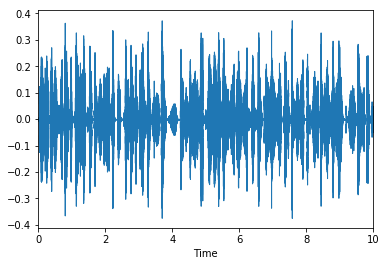

In [4]:
librosa.display.waveplot(y, sr=sample_rate)

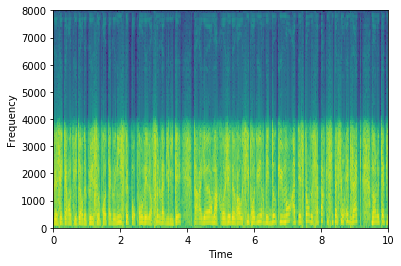

In [5]:
plt.specgram(y, Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [6]:
def parser(file_name_x):
    file_name = file_name_x
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=16000,mono=True) 
        pre_emphasis = 2
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    return mfccs,mel,contrast,tonnetz

In [7]:
def feature():
    path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
    files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]
    features=np.empty((0,205))
    label=np.empty((0,1))
    for f in files[1:10]:
        mfccs,chroma,contrast,tonnetz=parser(f)
        print(mfccs.shape,chroma.shape,contrast.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,1))

    return features,label

In [8]:
f,l=feature()

/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)
(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [9]:
print(f.shape)

(9, 205)


In [10]:
path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]

for f in files:
    print(f)
  

SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2302-human-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0303-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0103-guest-4-17.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0403-human-16.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0905-human-9.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1802-human-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1604-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1404-guest-5-20.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2403-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0904-guest-4-21.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2404-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2805-guest-1-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1603-guest-1-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1405-guest-1-6.wa